# Story - 5 : What Is The Effect Of The Earth's Temperature on Cyclonic Storms?

Historic data indicates that the occurrence and intensity of cyclonic storms (Hurricanes, Typhoons and Tornados) increases with the increased earth temperature. For this assignment you will need to tell this story to a non-technical audience (eg: a high-school earth science class).

Notes:
* Source historic data for a period of at least 25 years on a measure of the earth's temperature.

* Source data on the occurrence and intensity of hurricanes, typhoons and tornados for the same historic period.

* Perform the data analysis to establish the correlations between earth temperature and storm occurrence and intensity.

* Tell the story of this data and your analysis using data visualizations and other illustrations (eg: pictures of storm damage) in a presentation that will be accessible to a high-school earth science class.



# Introduction

In this assignment, I will merge data from several sources to show the effect of Earth's Temperature on the occurence and intensity of cyclonic storms.

- The *temperature* data for this assignment was gathered from NASA's website on climate. We will just be looking at the Year column and the Anomly, which measures the change in global surface temperature compared to the long-term average from 1951 to 1980(https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt).

- The *hurricane* data is from Colorado State University's Department of Atmospheric Science Tropical Meteorology Project (https://tropical.atmos.colostate.edu/Realtime/index.php?arch&loc=global).

- The *tornado* data was gathered from the National Center for Environmental Information (NCEI) website (https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/1)

Since the temperature data is based on the average temperature from 1951 to 1980, I will use 1980 as my basline and show how temperature, hurricanes, and tornadoes have changed since then.

# Gathering & Cleaning Data

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [206]:
tornado = pd.read_csv('https://raw.githubusercontent.com/LeJQC/MSDS/main/DATA%20608/Story%205/tornado.csv',header=1)
tornado.head()

,Date,Tornadoes,Fatalities
0,195012,201,70
1,195112,260,34
2,195212,240,231
3,195312,422,519
4,195412,550,36


In [207]:
tornado['YearMonth'] = pd.to_datetime(tornado['Date'].astype(str).str[:6], format='%Y%m')
tornado['Year'] = tornado['YearMonth'].dt.year  # Extract the year and create a new column 'Year'
tornado.drop(columns=['Date', 'YearMonth'], inplace=True)
tornado = tornado[['Year', 'Tornadoes']]

In [208]:
tornado.head()

,Year,Tornadoes
0,1950,201
1,1951,260
2,1952,240
3,1953,422
4,1954,550


In [209]:
hurricane = pd.read_csv('https://raw.githubusercontent.com/LeJQC/MSDS/main/DATA%20608/Story%205/hurricane.csv')
hurricane.head()

,Year,Named Storms,Named Storm Days,Hurricanes,Hurricanes Days,Cat. 3+ Hurricanes,Cat. 3+ Hurricanes Days,Accumulated Cyclone Energy
0,1980,73,367.25,43,143.75,19,30.25,638.0
1,1981,82,363.75,45,125.75,15,19.50,554.7
2,1982,81,428.75,46,162.25,21,37.75,709.2
3,1983,79,369.50,42,150.00,21,47.25,680.0
4,1984,93,439.00,47,160.25,20,41.25,726.2


In [210]:
hurricane = hurricane[['Year', 'Hurricanes', 'Cat. 3+ Hurricanes' ]]

In [211]:
df = pd.merge(hurricane, tornado, on='Year', how='inner')

In [212]:
df.head()

,Year,Hurricanes,Cat. 3+ Hurricanes,Tornadoes
0,1980,43,19,866
1,1981,45,15,782
2,1982,46,21,1049
3,1983,42,21,930
4,1984,47,20,912


In [213]:
temperature = pd.read_csv('https://raw.githubusercontent.com/LeJQC/MSDS/main/DATA%20608/Story%205/temperature.csv')
temperature.head()

,Year,Anomaly
0,1980,0.31
1,1981,0.35
2,1982,0.17
3,1983,0.35
4,1984,0.19


In [214]:
df = pd.merge(df, temperature, on='Year', how='inner')

In [215]:
df = df[['Year', 'Anomaly', 'Hurricanes', 'Tornadoes']]

In [216]:
# Converting C to F
df['Anomaly'] = (df['Anomaly'] * 9/5) + 32

In [217]:
baseline_year = 1980

# Calculate percentage increase from baseline for each dataset
df['Anomaly_Pct'] = ((df['Anomaly'] - df.loc[df['Year'] == baseline_year, 'Anomaly'].values[0]) / df.loc[df['Year'] == baseline_year, 'Anomaly'].values[0]) * 100
df['Hurricanes_Pct'] = ((df['Hurricanes'] - df.loc[df['Year'] == baseline_year, 'Hurricanes'].values[0]) / df.loc[df['Year'] == baseline_year, 'Hurricanes'].values[0]) * 100
df['Tornadoes_Pct'] = ((df['Tornadoes'] - df.loc[df['Year'] == baseline_year, 'Tornadoes'].values[0]) / df.loc[df['Year'] == baseline_year, 'Tornadoes'].values[0]) * 100

In [218]:
df.head()

,Year,Anomaly,Hurricanes,Tornadoes,Anomaly_Pct,Hurricanes_Pct,Tornadoes_Pct
0,1980,32.558,43,866,0.000000,0.000000,0.000000
1,1981,32.630,45,782,0.221144,4.651163,-9.699769
2,1982,32.306,46,1049,-0.774003,6.976744,21.131640
3,1983,32.630,42,930,0.221144,-2.325581,7.390300
4,1984,32.342,47,912,-0.663431,9.302326,5.311778


# Data Visualizations

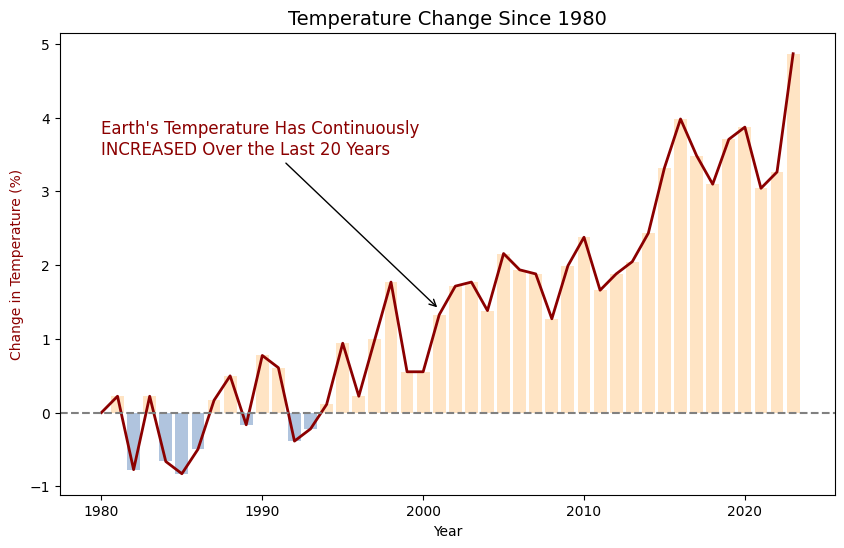

In [219]:
#Temperature

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df['Year'], df['Anomaly_Pct'], color='darkred', linewidth=2)
for i in range(len(df)):
    if df['Anomaly_Pct'].iloc[i] < 0:
        ax1.bar(df['Year'].iloc[i], df['Anomaly_Pct'].iloc[i], color='lightsteelblue')
    else:
        ax1.bar(df['Year'].iloc[i], df['Anomaly_Pct'].iloc[i], color='bisque')
ax1.axhline(y=0, color='gray', linestyle='--')

ax1.set_xlabel('Year')
ax1.set_ylabel('Change in Temperature (%)', color='darkred')
ax1.set_title('Temperature Change Since 1980', fontsize=14)
#ax1.legend(loc='lower right')
ax1.annotate("Earth's Temperature Has Continuously\nINCREASED Over the Last 20 Years",
             xy=(2001,1.4), xytext=(1980,3.5),arrowprops={'arrowstyle': '->'},fontsize=12,color='darkred')
plt.show()

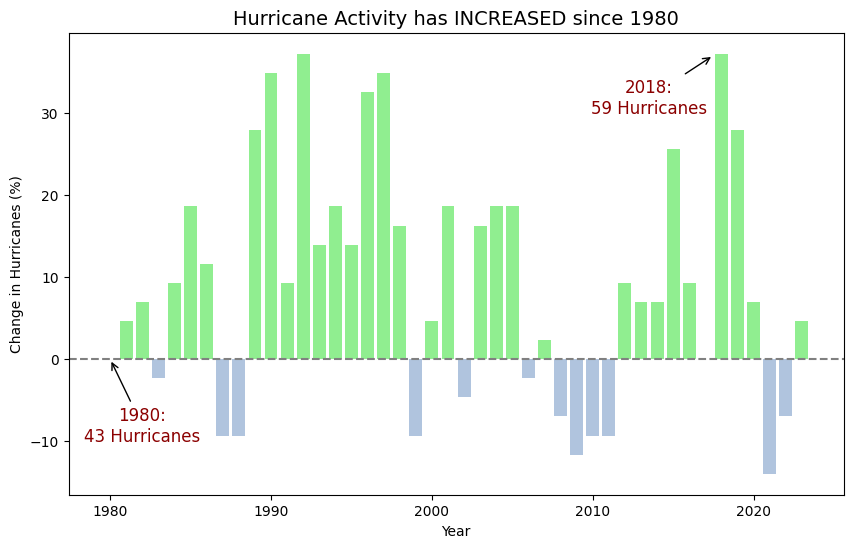

In [220]:
# Hurricane
fig, ax2 = plt.subplots(figsize=(10, 6))

# Plot Hurricanes on the left axis (ax2)
#ax2.plot(df['Year'],df['Hurricanes_Pct_5y'], color='darkgreen',linewidth=2)
ax2.set_ylabel('Change in Hurricanes (%)')
ax2.axhline(y=0, color='gray', linestyle='--')

for i in range(len(df)):
    if df['Hurricanes_Pct'].iloc[i] < 0:
        ax2.bar(df['Year'].iloc[i], df['Hurricanes_Pct'].iloc[i], color='lightsteelblue')
    else:
        ax2.bar(df['Year'].iloc[i], df['Hurricanes_Pct'].iloc[i], color='lightgreen')
ax2.annotate("1980:\n43 Hurricanes",
             xy=(1980,0), xytext=(1982,-10),arrowprops={'arrowstyle': '->'},fontsize=12,color='darkred',ha='center')
ax2.annotate("2018:\n59 Hurricanes",
             xy=(2017.5,37), xytext=(2013.5,30),arrowprops={'arrowstyle': '->'},fontsize=12,color='darkred',ha='center')


ax2.set_xlabel('Year')
ax2.set_title('Hurricane Activity has INCREASED since 1980', fontsize=14)
plt.show()

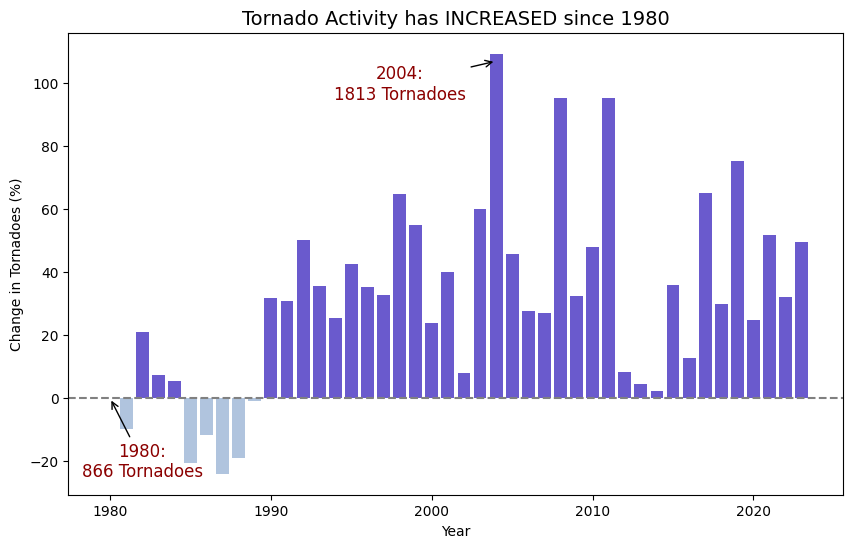

In [221]:
# Tornado
fig, ax3 = plt.subplots(figsize=(10, 6))

#ax2.plot(df['Year'],df['Hurricanes_Pct_5y'], color='darkgreen',linewidth=2)
ax3.set_ylabel('Change in Tornadoes (%)')
ax3.axhline(y=0, color='gray', linestyle='--')

for i in range(len(df)):
    if df['Tornadoes_Pct'].iloc[i] < 0:
        ax3.bar(df['Year'].iloc[i], df['Tornadoes_Pct'].iloc[i], color='lightsteelblue')
    else:
        ax3.bar(df['Year'].iloc[i], df['Tornadoes_Pct'].iloc[i], color='slateblue')
ax3.annotate("1980:\n866 Tornadoes",
             xy=(1980,0), xytext=(1982,-25),arrowprops={'arrowstyle': '->'},fontsize=12,color='darkred',ha='center')
ax3.annotate("2004:\n1813 Tornadoes",
             xy=(2004,107), xytext=(1998,95),arrowprops={'arrowstyle': '->'},fontsize=12,color='darkred',ha='center')

ax3.set_xlabel('Year')
ax3.set_title('Tornado Activity has INCREASED since 1980', fontsize=14)
plt.show()

In [222]:
# Average every 5 years
df['Anomaly_Pct_5yr'] = df['Anomaly_Pct'].rolling(window=5, min_periods=1).mean()
df['Hurricanes_Pct_5yr'] = df['Hurricanes_Pct'].rolling(window=5, min_periods=1).mean()
df['Tornadoes_Pct_5yr'] = df['Tornadoes_Pct'].rolling(window=5, min_periods=1).mean()

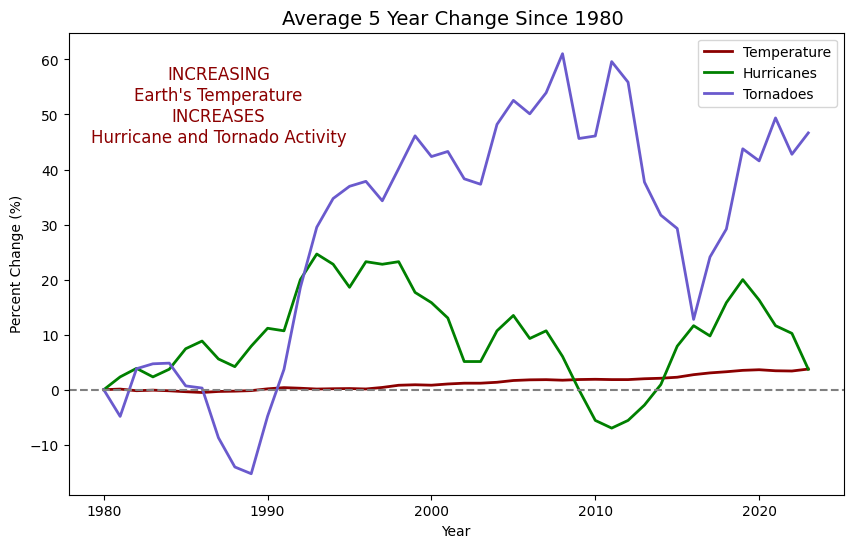

In [223]:
# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df['Year'], df['Anomaly_Pct_5yr'], color='darkred', linewidth=2, label='Temperature')
ax1.plot(df['Year'], df['Hurricanes_Pct_5yr'], color='green', linewidth=2, label='Hurricanes')
ax1.plot(df['Year'], df['Tornadoes_Pct_5yr'], color='slateblue', linewidth=2, label='Tornadoes')
ax1.axhline(y=0, color='gray', linestyle='--')
ax1.text(1987, 45,"INCREASING\nEarth's Temperature\nINCREASES\nHurricane and Tornado Activity",fontsize=12,ha='center',color='darkred')


ax1.set_ylabel('Percent Change (%)')
ax1.set_xlabel('Year')
ax1.set_title('Average 5 Year Change Since 1980 ', fontsize=14)
ax1.legend(loc='upper right')
plt.show()

# Conclusion

In conclusion, there is a significant correlation between the Earth's temperature and the occurence of cyclonic storms. As shown in the visuals, the Earth's temperature has steadily increased since 1980 and as a result so has the occurences of hurricanes and tornadoes.

There were a lot of fluctations in hurricane and tornado activity so I wanted to plot a moving average of them. This way it will highlight the long term trend and reduce the impact of short term fluctations. By plotting this moving average, it shows the area over 0, which represents the baseline in 1980. Even a miniscule change in the Earth's temperature can resulted in a 60% increase in tornado activity or a 20% increase in hurricane activity.

